In [ ]:
--SOLUCION 1 
with protocols_organized (protocol,client)
	as (
	SELECT
		protocol, client
		FROM traffic
		group by client, protocol
	)


SELECT
  distinct t.client,
  t.protocol
FROM traffic
INNER JOIN (
    SELECT
    STRING_AGG(protocol, ',') AS protocol, client
    FROM protocols_organized
    group by client
  ) AS t
ON traffic.client = t.client
ORDER BY client

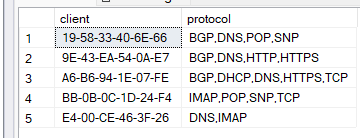


In [ ]:
--SOLUCION 2
SELECT
  client,
  STUFF(
    (SELECT  distinct protocol +', '
     FROM traffic
     WHERE client = a.client
     FOR XML PATH ('')),
    1,
    0,
    '') AS [protocol]
FROM traffic AS a
GROUP BY client
ORDER BY client

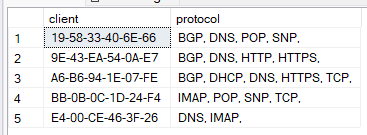

In [ ]:

%%cmd 
python test_counts.py

In [29]:
# # Para cada partido del equipo B, calcula el número total de partidos del
# # equipo A en los que el equipo A ha marcado menos o igual que el número de goles marcados
# # por el equipo B en ese partido.



equipoB = [3, 1, 7, 8]
equipoA = [2, 10, 5, 4, 8]


def counts(equipoA, equipoB):

    resultado=[]
    
    for valor_partidoB in  equipoB:

        gol_menor_partido=0

        for valor_partidoA in equipoA:

            if  valor_partidoA <= valor_partidoB:
                
                gol_menor_partido = gol_menor_partido+1

        resultado.append(gol_menor_partido)
        
    return resultado

print(counts(equipoA,equipoB))

[1, 0, 3, 4]
